In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster


In [46]:
routes_data = pd.read_csv('../../data/gtfs3Sept/routes.txt', sep=",")
trips_data = pd.read_csv('../../data/gtfs3Sept/trips.txt', sep=",")
stop_times_data = pd.read_csv('../../data/gtfs3Sept/stop_times.txt', sep=",")
calendar_data = pd.read_csv('../../data/gtfs3Sept/calendar.txt', sep=",")


In [67]:
trips_routes_merge = pd.merge(trips_data, routes_data, on='route_id')
trips_routes_merge = trips_routes_merge.loc[trips_routes_merge['route_type'] == 0]
trips_routes_calendar = pd.merge(trips_routes_merge, calendar_data, on='service_id')
trips_routes_calender_stops = pd.merge(stop_times_data, trips_routes_calendar, on='trip_id')
trips_routes_calender_stops.drop(['route_desc','route_long_name','route_type','route_color','route_text_color', 'shape_id','route_url','end_date', 'tuesday', 'wednesday', 'thursday', 'friday', 'block_id','pickup_type', 'drop_off_type', 'stop_sequence', 'departure_time', 'trip_id'], inplace=True, axis=1)


trips_routes_calender_stops = trips_routes_calender_stops.loc[(trips_routes_calender_stops['direction_id'] == 0) & (trips_routes_calender_stops['saturday'] == 1) & (trips_routes_calender_stops['stop_id'] == '5705') & (trips_routes_calender_stops['route_short_name'] == '3')& (trips_routes_calender_stops['start_date'] == 20210911)]
print(trips_routes_calender_stops)



       arrival_time stop_id  route_id  service_id  trip_headsign  \
375290     20:47:31    5705         5   237647501  VANDERKINDERE   
375314     21:58:31    5705         5   237647501  VANDERKINDERE   
375386     22:28:31    5705         5   237647501  VANDERKINDERE   
375434     22:43:31    5705         5   237647501  VANDERKINDERE   
375458     20:58:31    5705         5   237647501  VANDERKINDERE   
...             ...     ...       ...         ...            ...   
380637     23:28:31    5705         5   237647501  VANDERKINDERE   
380685     23:13:31    5705         5   237647501  VANDERKINDERE   
380733     22:58:31    5705         5   237647501  VANDERKINDERE   
384010     06:19:31    5705         5   237647501  VANDERKINDERE   
384522     24:13:31    5705         5   237647501  VANDERKINDERE   

        direction_id route_short_name  monday  saturday  sunday  start_date  
375290             0                3       0         1       0    20210911  
375314             0       

In [75]:
def time_to_sec(time:str):
    time = time.split(":")
    hours, minutes, seconds = int(time[0]), int(time[1]), int(time[2])
    return hours*60*60+minutes*60+seconds

In [83]:
arrival_times = trips_routes_calender_stops['arrival_time'].tolist()
arrival_times_minutes = map(time_to_sec, arrival_times)
arrival_times_minutes = sorted(arrival_times_minutes)
print(arrival_times_minutes)
print(len(arrival_times_minutes))

[18271, 19771, 20971, 21871, 22771, 23671, 24511, 25411, 26191, 26911, 27631, 28351, 29071, 29791, 30511, 31231, 31951, 32671, 33391, 34111, 34831, 35551, 36271, 36991, 37711, 38431, 39151, 39871, 40591, 41311, 42031, 42751, 43471, 44191, 44851, 45331, 45751, 46231, 46651, 47131, 47551, 48031, 48451, 48931, 49351, 49831, 50251, 50731, 51151, 51631, 52051, 52531, 52951, 53431, 53851, 54331, 54751, 55231, 55651, 56131, 56551, 57031, 57451, 57871, 58291, 58771, 59191, 59671, 60091, 60571, 60991, 61471, 61891, 62371, 62791, 63271, 63691, 64171, 64591, 65071, 65491, 65971, 66391, 66871, 67291, 67771, 68251, 68671, 69151, 69571, 70051, 70471, 70951, 71431, 71851, 72331, 72751, 73291, 73831, 74311, 74851, 75511, 76231, 76951, 77671, 78391, 79111, 80011, 80911, 81811, 82711, 83611, 84511, 85411, 86311, 87211]
116


In [84]:
x, y = [], []
print(arrival_times_minutes[0+1]-arrival_times_minutes[0])
print(arrival_times_minutes[1+1]-arrival_times_minutes[1])
for i in range(len(arrival_times_minutes)-1):
    #if round((arrival_times_minutes[i+1]-arrival_times_minutes[i])/60, 2):
    y.append(round((arrival_times_minutes[i+1]-arrival_times_minutes[i])/60, 2))
    x.append(round(arrival_times_minutes[i]/3600, 2))

1500
1200


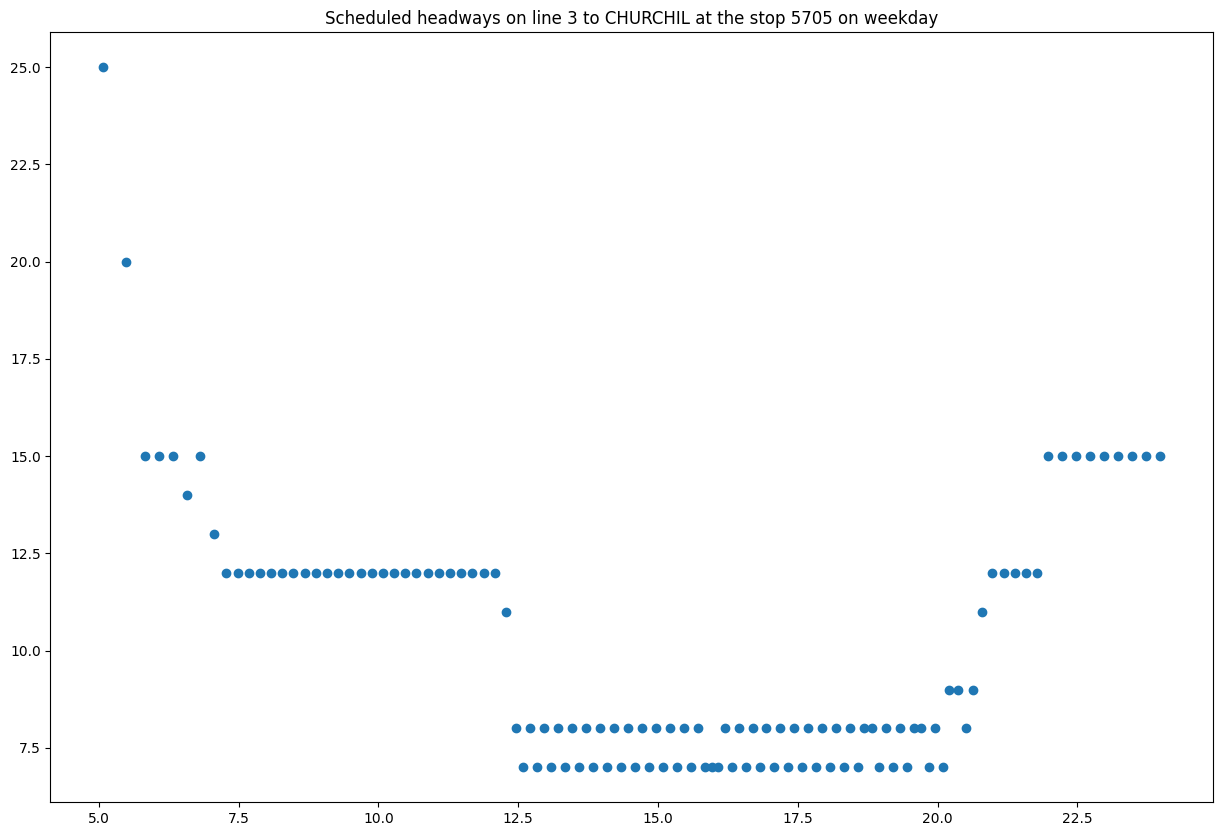

In [88]:
title = f"Scheduled headways on line 3 to CHURCHIL at the stop 5705 on weekday"
plt.figure(figsize=[15,10])
plt.scatter(x, y)
plt.title(title)
plt.show()

In [95]:
z=np.array([list(x) for x in list(zip(x,y))])

clustering = cluster.MeanShift(bandwidth =2.5 ).fit(z)
#clustering = cluster.AgglomerativeClustering(5).fit(z)
labels = clustering.labels_
print(np.unique(labels))

[0 1 2 3 4 5 6]


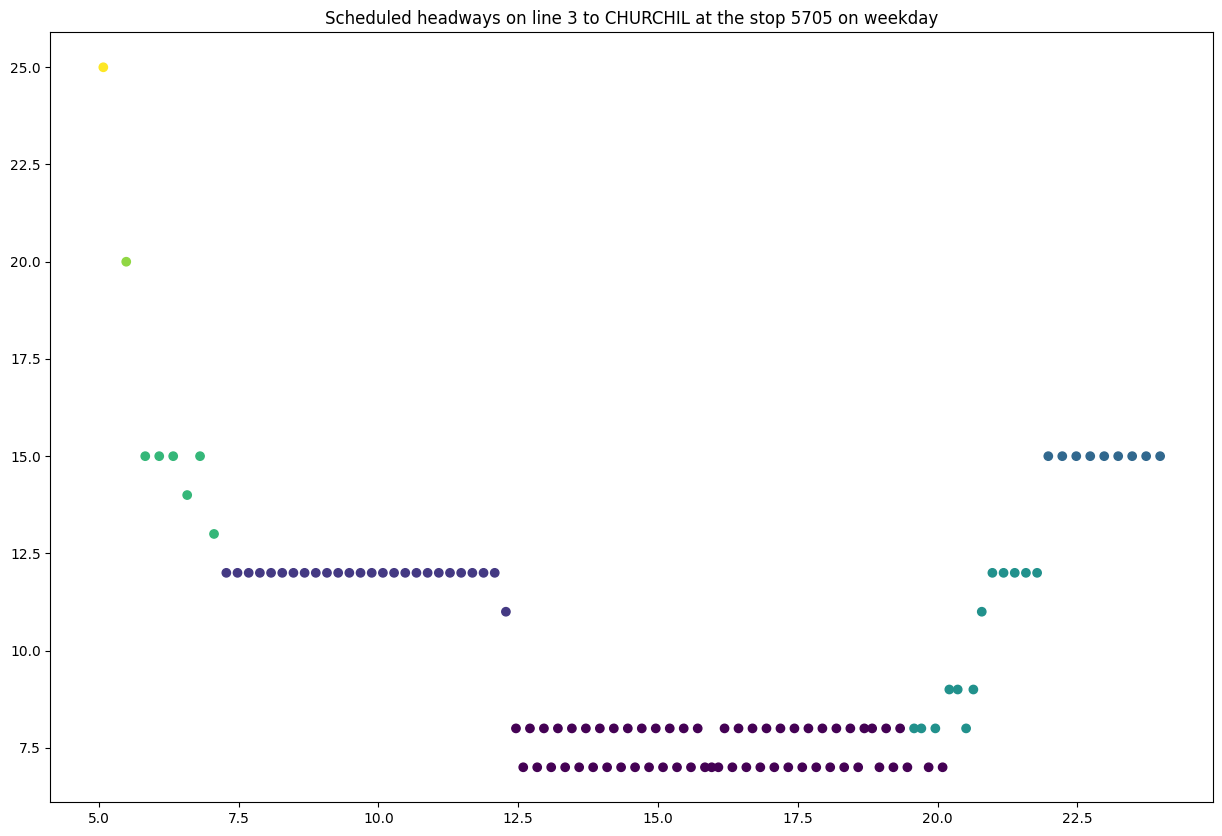

In [96]:
plt.figure(figsize=[15,10])
plt.scatter(x, y, c=labels)
plt.title(title)
plt.show()